# Lab 6

Sierra Wilde and Michael Higgins

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from scipy import stats
import random

Here I am using stats.possion.rvs to make a Poisson background distribution with a mean of 100 particle counts. I am doing 100,000 simulations following this Poisson distribution in order to make sample background measurements. This will be the makeshift LHC background data, which is the number of particle counts that are not considered to be a signal. The plots of the background are fitted to a true Poisson pmf to compare how well the simulation follows this distribution.

In [7]:
#simulating a poisson distribution with a mean of 100
background_pmf = stats.poisson.rvs(100, size=100000)

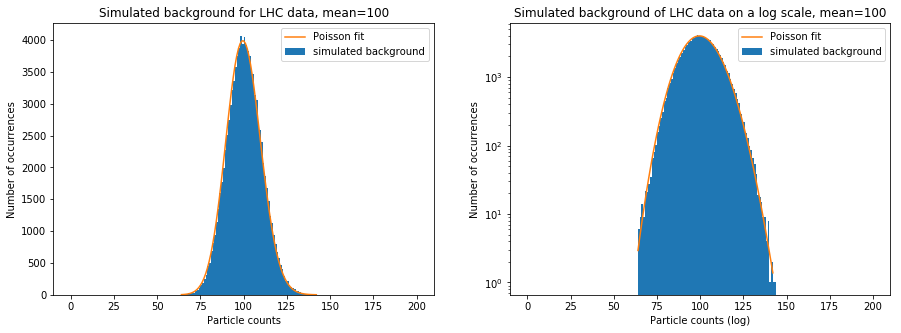

In [28]:
#plotting the background distribution that I simulated with a true poisson pmf as a reference
x = np.arange(background_pmf.min(), background_pmf.max())
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Simulated background for LHC data, mean=100')
ax[0].set_xlabel('Particle counts')
ax[0].set_ylabel('Number of occurrences')
ax[0].hist(background_pmf, bins=np.arange(0, 201), width=1, label='simulated background');
ax[0].plot(x, 100000*stats.poisson.pmf(x, 100), label='Poisson fit')
ax[0].legend()
ax[1].set_title('Simulated background of LHC data on a log scale, mean=100')
ax[1].set_xlabel('Particle counts (log)')
ax[1].set_ylabel('Number of occurrences')
ax[1].set_yscale('log')
ax[1].hist(background_pmf, bins=np.arange(0, 201), width=1, label='simulated background');
ax[1].plot(x, 100000*stats.poisson.pmf(x, 100), label='Poisson fit')
ax[1].legend()

100,000 Poisson distribution simulation of the LHC background on a regular and a log scaled plot with a true Poisson pmf fitted to it. The fitted curve can be used for later analysis. Both the simulation and pmf have a mean of 100 particle counts.

## Problem 1

In order to find the 5$\sigma$ value of the simulated background, I must use the fitted pmf in order to be able to calculate the integral under the curve effectively. The integral corresponds to the probability of measuring a range of values, which is related to the 5$\sigma$ threshold. Since I used the Poisson distribution (stats.poisson.rvs) to create 100,000 events with a mean count number of 100, the Poisson pmf (stats.poisson.pmf) with a mean of 100 fits the background. I find the number of counts on the Poisson pmf that, when integrated to $\infty$,  gives a probability associated with measuring a signal 5$\sigma$ away from the mean or greater of a Gaussian distribution with a mean of 0 and a standard deviation of 1. This gives the upper limit 5$\sigma$, and to get the lower limit, I do the same thing, just with a probability of -5$\sigma$ of lower. Since a Gaussian distribution is symmetric, these probabilities are the same. However, since a Poisson distribution is not symmetric except at large mean where the central limit theorem applies, the $\pm 5\sigma$ values might not be the same distance away from the mean.

In [9]:
#using stats.norm.sf to get the probability of measuring 5sigma or greater of a Gaussian
prob_5sigma = stats.norm.sf(5)

#using stats.poisson.isf and stats.poisson.ppf to get the upper and lower limits, respectively of the 5sigma threshold on the background distribution
upper_threshold = stats.poisson.isf(prob_5sigma, 100)
lower_threshold = stats.poisson.ppf(prob_5sigma, 100)
print('The upper limit 5 sigma theshold is {} and the lower limit 5 sigma threshold is {} for the LHC background.'.format(upper_threshold, lower_threshold))

The upper limit 5 sigma theshold is 154.0 and the lower limit 5 sigma threshold is 54.0 for the LHC background.


Here it can be seen that the 5$\sigma$ values are not symmetric about the mean of 100, which is consistent with the characteristics of the Poisson background distribution. They are relatively close to being symmetric, since $\mu$=100 is a large mean, and thus the distribution is approaching that of a Gaussian.

## Problem 2

Here I am following the same procedure as in Problem 1, except I am finding the threshold value for 8$\sigma$ instead of 5$\sigma$, and I am only concerned about the upper bound. I assume that potential signals happen above the 100-mean count background. I am finding a signal that is strong enough that it can be discriminated from the background vary easily, so that I can see how even an obvious detection is affected by the background.

In [10]:
#finding the 8 sigma threshold
prob_8sigma = stats.norm.sf(8)
threshold = stats.poisson.isf(prob_8sigma, 100)
print('The 8 sigma value of this distribution is {}'.format(threshold))

The 8 sigma value of this distribution is 190.0


In order to inject a signal of 190 into the background noise, I am adding the value 190 to 100,000 randomly selected values from the simulated background distribution. The randomly selected values will still follow the same Poisson distribution, and help account for random fluxuations that occur in the background during each run. This will simulate many possible measurements of event with the same true signal, but are smeared by the background noise. Even if the signal source is giving the exact same number of counts each time, because of the background, there will be a number of possible observed signals that may or may not be the true signal value. I have plotted the histogram of the possible observed signals below, on regular and log scale plots.

In [13]:
#making a list of random indices to apply to the background
indices = []
for i in range(0, 100000):
    indices.extend([random.randint(0, len(background_pmf)-1)])

#adding the random values from the background to a signal of 190
obs_sig = background_pmf[indices] + 190

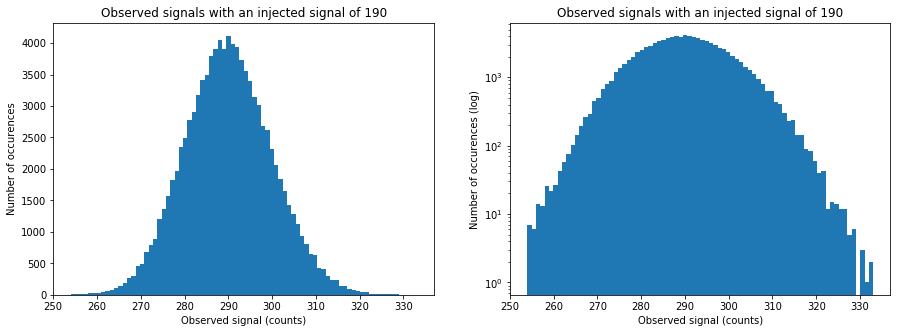

In [47]:
#plotting the observed signal and the background
k = np.arange(obs_sig.min(), obs_sig.max())
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Observed signals with an injected signal of 190')
ax[0].set_xlabel('Observed signal (counts)')
ax[0].set_ylabel('Number of occurences')
ax[0].hist(obs_sig, bins=80)
ax[1].set_title('Observed signals with an injected signal of 190')
ax[1].set_xlabel('Observed signal (counts)')
ax[1].set_ylabel('Number of occurences (log)')
ax[1].hist(obs_sig, bins=80)
ax[1].set_yscale('log')

A signal of 190 is injected into the background 100,000 times in order to simulate how the number of particle counts is affected by the LHC background distribution.

In [15]:
print('The mean of the observed signal is {}'.format(np.mean(obs_sig)))

The mean of the observed signal is 289.97643


In [53]:
#printing the 5th and 95th percentile bounds - the mean to see how symmetric the distribution is
print(np.quantile(obs_sig, 0.05)-290)
print(np.quantile(obs_sig, 0.95)-290)

-16.0
17.0


Since the mean of the observed signal is about 290, and the injected signal is 190, the observed signal is biased by the mean of the background distribution, 100. The distribution of the observed signal is not centered around the injected signal's value. The observed signal is approximately symmetric, but not entirely. The 5th percentile and the 95th percentile values are 16 and 17 counts away from the mean. If the distribution were perfectly symmetric, these would be the same number away. To the eye, the regular distribution looks very symmetric, and only varies away slightly on the log plot. In fact, this distribution is the same as the original background distribtution. Adding the same signal to the background will result in the distribution shifting by the signal, but otherwise remaining the same.

## Problem 3

I am generating a list of injected signals over a wide range of values: 0-1000 to use many different signal strengths. I am only making integer signals, because the signal is particle counts. It is not possible to have a fraction of a particle. This is different than the example in class which was done with a Gaussian distribution, which is a continuous distribution, and thus measurements can be continuous. The Poisson distribution is discrete. After making the list of signals to be injected, I used the same method as in Problem 2: I randomly selected 100,000 background measurements and added them to the injected signal values. Each injected signal was added to the background 100,000 times. This simulates a distribution of observed signal values at each injected signal. The number of measured particle counts will vary at each injected signal, because the background noise is not always constant. Each injected signal has a distribution of measured signals associated with it according to the background.

In [55]:
# finding the distributions of a range of sigma values
obs_signals = np.array([background_pmf[indices] + each for each in signals])
#creating an array of each signal that is as long as the observed signal array
signal_array = np.array([])
for signal in signals:
    new_array = np.array([signal for i in range(0, len(obs_signals[0]))])
    signal_array = np.concatenate((signal_array, new_array))

Below is the 2D histogram of the distribution of observed signals at range of true signal counts. The color indicates the number of times the injected signal was measured as a certain observed signal. The observed signal is the background distribution added to the injected signal.

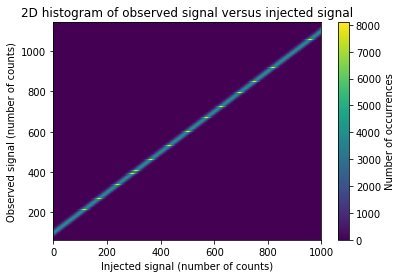

In [66]:
#plotting the 2-d histogram of injected signal vs observed signal
plt.figure()
plt.title('2D histogram of observed signal versus injected signal')
plt.hist2d(signal_array, obs_signals.flatten(), bins = [1000, 1000])
plt.xlabel('Injected signal (number of counts)')
plt.ylabel('Observed signal (number of counts)')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Number of occurrences');

2D histogram of observed signals after injecting a range of signals from 0 to 1000 into the background distribution.

In [57]:
#finding the mean and mode of the observed signal with an injected signal 0
print('Mean observed signal of an injected signal of 0: {}'.format(obs_signals[0].mean()))
print('Mode: {}'.format(stats.mode(obs_signals[0])))

Mean observed signal of an injected signal of 0: 99.97643
Mode: ModeResult(mode=array([100]), count=array([4114]))


The histogram is shifted up from the y-axis by about 100, which is the mean of the background distribution. If the background distribution was centered around 0, the histogram would start near the origin. The brightest parts of the histogram correspond with the greatest number of occurrences, or the mode. The mode of the observed signal with an injected signal of 0 is 100. The center of the line is the mode, because it is what is most visible on the histogram. Thus 100 is the y-intercept.

Here I am verifying that the distribution I made in Problem 2 of the possible observed signals with an injected signal of 190 matches the 2D histogram slice at 190. They should be the same, because both are displaying the probability of measuring certain particle counts of the same signal. I have plotted histograms of one on top of the other to compare their shapes.

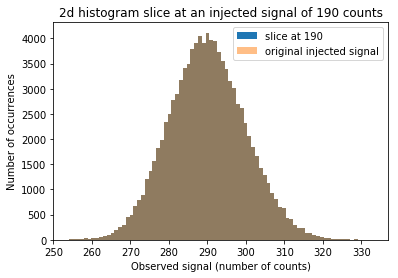

In [58]:
#plotting histograms of the plot in problem 2 and the slice of the 2d histogram
plt.figure()
plt.title('2d histogram slice at an injected signal of 190 counts')
plt.hist(obs_signals[190], bins=80, label='slice at 190')
plt.hist(obs_sig, bins=80, alpha=0.5, label='original injected signal')
plt.xlabel('Observed signal (number of counts)')
plt.ylabel('Number of occurrences')
plt.legend();

Distribution of observed signal at an injected signal of 190 using a slice of the 2D histogram made earlier in Problem 3 and the distribution made in Problem 2.

The slice of the 2D histogram at 190, and the distribution of injecting 190 into the background in Problem 2 overlap completely. They should be the same because the background distibution is the same for each round of signal injections.

I am picking an observed signal of 500 to see the distribution of injected signals that could have given this measurement. I am making a mask of the injected signal values that gave an observed measurement of 500 during the simulation in Problem 3. I then make a histogram of this selection of injected signals in order to see the distribution. Because each injected signal does not give the same observed measurement each time, an observed signal of one value could have arisen from multiple different injected signals. After making a measurement, there is some uncertainty what the true signal is. By observing the distribution, it is possible to get a better idea of which injected signals are more likely to be associated with a given observed signal.

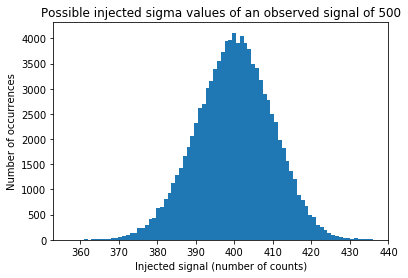

In [59]:
#creating a mask of where the true signal gave an observed signal 500
observed_500 = np.array(signals)[np.where(obs_signals == 500)[0]]

#plotting the distribution of injected signals for an observed signal of 500
plt.figure()
plt.title('Possible injected sigma values of an observed signal of 500')
plt.hist(observed_500, bins=80)
plt.xlabel('Injected signal (number of counts)')
plt.ylabel('Number of occurrences');

Distribution of possible injected signals that could have given an observed signal of 500 particle counts.

In [60]:
#finding the mean and mode of the injected signals from an observed signal of 500
print(observed_500.mean())
print(stats.mode(observed_500))

400.02357
ModeResult(mode=array([400]), count=array([4114]))


This histogram is the distribution of possible values of the injected signal for an observed signal of 500. This means that, if one was to measure a signal 500, there is a range of possibilities of what the true, or injected signal is without the background noise. The distribution has a mean and mode of 400, and thus the most probable injected signal is 400, because this is the number of counts with the maximum probability.

In [67]:
#finding the upper and lower limits of 1 sigma for the observed signal of 500 by using np.qunatile
sigma_upper = np.quantile(observed_500, 0.84)
sigma_lower = np.quantile(observed_500, 0.16)
print('The 1 sigma uncertainty of the injected signal is {} to {} particle counts.'.format(sigma_lower, sigma_upper))

The 1 sigma uncertainty of the injected signal is 390.0 to 410.0 particle counts.


In [69]:
print(prob_5sigma)

2.866515718791933e-07


In [70]:
#finding the 5 sigma threshold
sigma_5upper = np.quantile(observed_500, 1-prob_5sigma)
sigma_5lower = np.quantile(observed_500, prob_5sigma)
print(sigma_5lower)
print(sigma_5upper)

357.0
436.0


The distribution is biased, because an observed signal of 500 has a distribution of injected signals centered at 400. The observed signal is always going to be higher than the true, injected signal. Because the 1$\sigma$ thresholds are an equal distance from the mean, at first it would appear that the distribution is symmetric, however bringing it out to 5$\sigma$ shows that it is not. The 5$\sigma$ threshold values are not centered at 400, and thus the distribtution is not symmetric.

## Problem 4

I am trying to pick a weak signal that is around 1$\sigma$. I first need to calculate what the 1$\sigma$ threshold for the background is. I am using the same method that is described in Problem 1 and the very beginning of Problem 2.

In [61]:
#finding the 1 sigma value
prob_1sigma = stats.norm.sf(1)
sigma_val = stats.poisson.isf(prob_1sigma, 100)
print('The 1 sigma value of the background distribution is {}'.format(sigma_val))

The 1 sigma value of the background distribution is 110.0


For simplicity's sake, I am using the value 110 for this study. Using the same method as described in Problem 3, I am creating a mask of the injected to signals where an observed signal of 110 arose. The histogram of the mask shows the distribution of injected signals that could have been measured to be 110 particles.

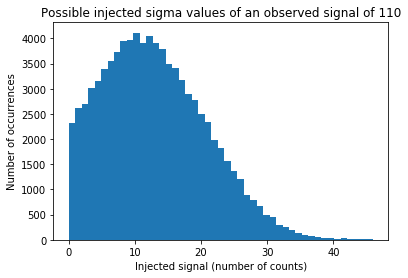

In [62]:
#creating a mask of where the true signal gave an observed signal 100
observed_110 = np.array(signals)[np.where(obs_signals == 110)[0]]
plt.figure()
plt.title('Possible injected sigma values of an observed signal of 110')
plt.hist(observed_110, bins=47, width=1)
plt.xlabel('Injected signal (number of counts)')
plt.ylabel('Number of occurrences');

Distribution of the possible injected signals that could have given an obseved signal of 110.

Since zero is a significant probability in this distribution, this means that there is a good chance that there is no injected signal, and all that is being measured is just background. Since this is within the 5$\sigma$ threshold, any injected signal that shows up in the above probability distributiion is not statistically significant. In order to claim a detection, the probability distribution of injected signal must be well above zero.

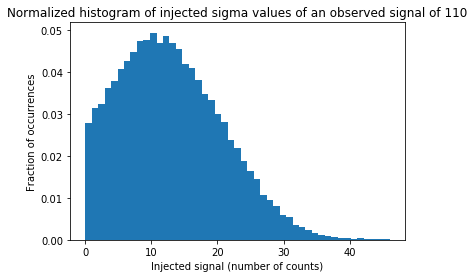

In [63]:
#normalizing the distribution
x= np.arange(0, 48)
plt.figure()
plt.title('Normalized histogram of injected sigma values of an observed signal of 110')
plt.hist(observed_110, bins=47, width=1, density=True)
plt.xlabel('Injected signal (number of counts)')
plt.ylabel('Fraction of occurrences');

Normalized histogram of the previous figure.

With an observed signal of 110, the injected signal would be less than the 95% confidence upper bound 95% of the time. This is when the integral from the bound to zero equals 0.95. I am finding the point where 95% of the data lies below the distribution shown above, which is also the 95th percentile point, using np.quantile.

In [64]:
#finding the number of counts where 95% of the time the signal is less than that value
confidence_95 = np.quantile(observed_110, 0.95)
print('The 95% confidence level is {}'.format(confidence_95))

The 95% confidence level is 27.0


Since an observed number of counts of 110 is well below the 5$\sigma$ threshold, a discovery cannot be claimed. However, there is still a chance that there is a low injected signal that is not part of the background. If there is an injected signal when the observed signal is 110 counts, 95% of the time the injected signal is 27 counts or less.